In [41]:
        import statsmodels.tsa.stattools as st
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
plt.style.use('seaborn')
import numpy as np
import pandas as pd
import pandas_datareader.data as web

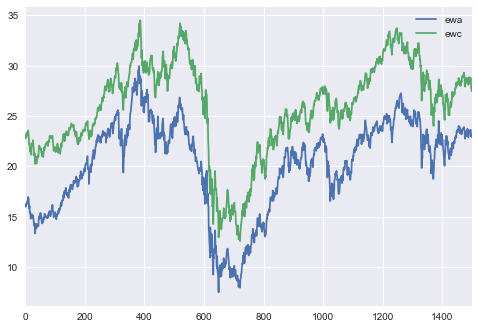

In [12]:
df = pd.read_csv('ETF.csv',index_col=0)
df[['ewa','ewc']].plot()
plt.show()

In [ ]:
DOMESTIC
Total US
Puerto Rico
Canada
Japan
France
Germany
Italy
Spain
United Kingdom
Turkey market
Israel market
Poland market
Czech Sub Cluster
Hungary market
Czech Republic market
Slovakia market
Balkans Sub Cluster
Romania market
Ukraine market
Bulgaria market
Adriatic
Slovenia market
Croatia market
Serbia and CBC
Serbia market
Central Balkan Countries DM
Albania market
Montenegro
Kosovo
Macedonia market
Bosnia-Herzegovina Total
Bosnia Herzegovina market
Eurasia & Baltics
Russia market
Belarus market
Caucar
Kazakhstan market
Baltics
Lithuania market
Latvia market
Estonia market
Non Market - Cluster II
Non Market - Cluster I
Sweden/Finland
Finland
Sweden
Denmark/Iceland/Norway
Denmark
Denmark market
Norway
Austria/Switzerland
Austria
Switzerland
Portugal
Netherlands
Ireland
Greece Region
Cyprus market
Malta market
Greece market
Belgium Luxembourg
Korea market
Non Market Asia
DM Mgmt Eval
Australia_New Zealand
NEW_ZEALAND
Australia
Mexico market
Brazil market
Chile market
Colombia / Venezuela
Colombia market
Argentina Region
Uruguay market
Argentina market
Central America
Barbados market
Nicaragua market
Panama market
El Salvador market
Honduras market
West Indies market
Guatemala
Costa Rica
Dominican Republic
Peru/Ecuador/Bolivia
Ecuador market
Bolivia market
Peru market
China Total
China market
Taiwan market
Philippines market
Hong Kong market
EM Mgmt Eval
Vietnam/Pakistan
Vietnam market
Pakistan market
Thailand/Indochina
Thailand market
Malaysia/Singapore/Indonesia
Singapore market
Malaysia market
Indonesia market
India Region
Total MER
Saudi Arabia market
Gulf States
Kuwait
Arab Peninsula States
Bahrain market
Quatar market
Oman market
United Arab Emirates market
Total Egypt/Levant -Iran/Iraq
Levant
Lebanon market
Jordan market
Iran and Iraq
Iraq market
Egypt/Sudan
Egypt market
Total Africa
Sub Sahara Africa
West Africa Region
Nigeria market
Ghana market
South Africa Region
South Africa market
East Africa
Kenya market
North Africa
Morocco market
Libya market
Algeria market
Tunisia market


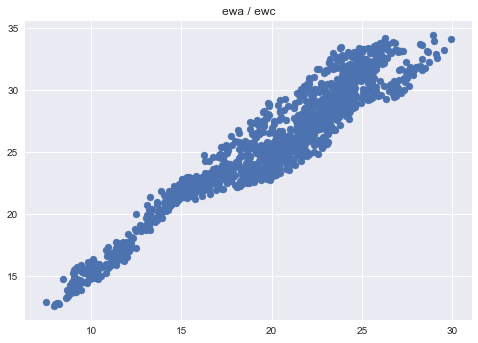

In [36]:
plt.scatter(df['ewa'],df['ewc'])
plt.title('ewa / ewc')
plt.show()

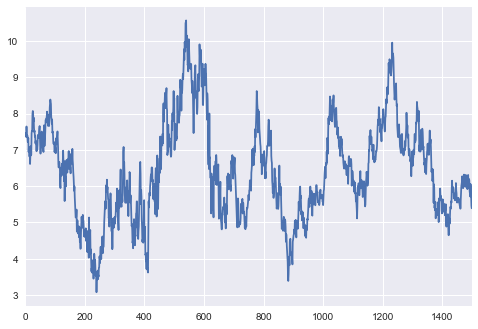

In [39]:
df['coint'] = df['ewc']-hedgeRatio*df['ewa']
df['coint'].plot()
plt.show()

In [34]:
# cadf.py

def plot_price_series(df, ts1, ts2):
    months = mdates.MonthLocator()  # every month
    fig, ax = plt.subplots()
    ax.plot(df.index, df[ts1], label=ts1)
    ax.plot(df.index, df[ts2], label=ts2)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.set_xlim(datetime.datetime(2012, 1, 1), datetime.datetime(2013, 1, 1))
    ax.grid(True)
    fig.autofmt_xdate()

    plt.xlabel('Month/Year')
    plt.ylabel('Price ($)')
    plt.title('%s and %s Daily Prices' % (ts1, ts2))
    plt.legend()
    plt.show()

In [25]:
# cadf.py

def plot_scatter_series(df, ts1, ts2):
    plt.xlabel('%s Price ($)' % ts1)
    plt.ylabel('%s Price ($)' % ts2)
    plt.title('%s and %s Price Scatterplot' % (ts1, ts2))
    plt.scatter(df[ts1], df[ts2])
    plt.show()

In [26]:
# cadf.py

def plot_residuals(df):
    months = mdates.MonthLocator()  # every month
    fig, ax = plt.subplots()
    ax.plot(df.index, df["res"], label="Residuals")
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.set_xlim(datetime.datetime(2012, 1, 1), datetime.datetime(2013, 1, 1))
    ax.grid(True)
    fig.autofmt_xdate()

    plt.xlabel('Month/Year')
    plt.ylabel('Price ($)')
    plt.title('Residual Plot')
    plt.legend()

    plt.plot(df["res"])
    plt.show()

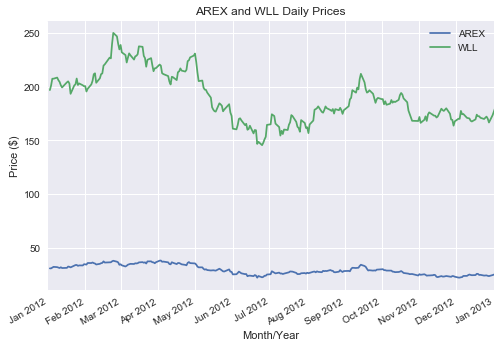

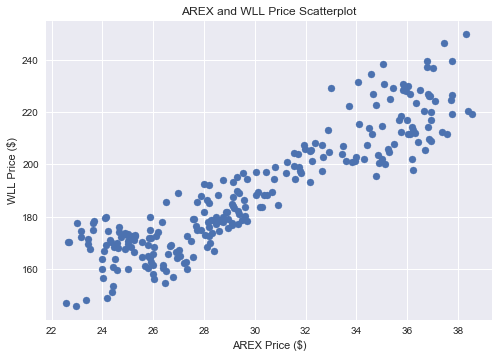

NameError: name 'ols' is not defined

In [42]:
# cadf.py

if __name__ == "__main__":
    start = datetime.datetime(2012, 1, 1)
    end = datetime.datetime(2013, 1, 1)

    arex = web.DataReader("AREX", "yahoo", start, end)
    wll = web.DataReader("WLL", "yahoo", start, end)

    df = pd.DataFrame(index=arex.index)
    df["AREX"] = arex["Adj Close"]
    df["WLL"] = wll["Adj Close"]

    # Plot the two time series
    plot_price_series(df, "AREX", "WLL")

    # Display a scatter plot of the two time series
    plot_scatter_series(df, "AREX", "WLL")

    # Calculate optimal hedge ratio "beta"
    res = ols(y=df['WLL'], x=df["AREX"])
    beta_hr = res.beta.x

    # Calculate the residuals of the linear combination
    df["res"] = df["WLL"] - beta_hr*df["AREX"]

    # Plot the residuals
    plot_residuals(df)

    # Calculate and output the CADF test on the residuals
    cadf = ts.adfuller(df["res"])
    pprint.pprint(cadf)